# Intro to Regression Models
&copy; QuantSprout

### Capital Bike Share
=========================================    
Dataset characteristics

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- holiday : whether day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. 
- atemp: Normalized feeling temperature in Celsius. 
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

Import pandas

In [1]:
import pandas as pd

Read the `bike_sharing_day.csv` file and investigate the data

In [2]:
data = pd.read_csv('bike_sharing_day.csv')

In [3]:
data.info()
data.head()

# temperatures are normalized

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


Convert dates from text to datetime format

In [5]:
data['date'] = pd.to_datetime(data.dteday)

In [6]:
data.info()

# with datetime, can now actually graph bikecount based on date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    object        
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  date        731 non-null  

Plot bike count vs date

<AxesSubplot:xlabel='date'>

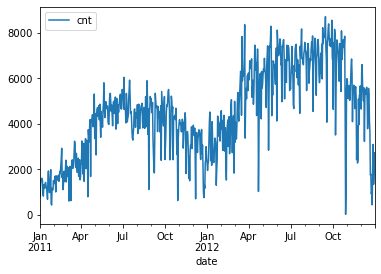

In [8]:
data.plot(x='date', y='cnt')

# lot of seasonality in the data
# also a growing business
# outliers: there are some unusually low and high data points

Investigate season data with a boxplot:  `data.boxplot('cnt','season')`

<AxesSubplot:title={'center':'cnt'}, xlabel='season'>

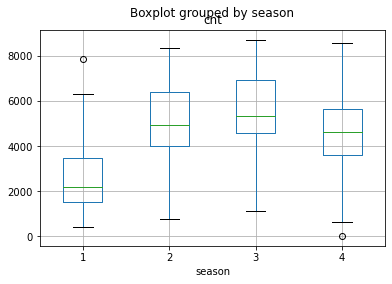

In [9]:
data.boxplot('cnt', 'season')

# 1: spring sees the lowest usage

Investigate weather situation with boxplot

<AxesSubplot:title={'center':'cnt'}, xlabel='weathersit'>

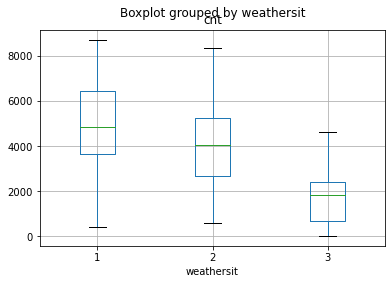

In [10]:
data.boxplot('cnt', 'weathersit')

# count by weather situation

Investigate workingday with boxplot

<AxesSubplot:title={'center':'cnt'}, xlabel='workingday'>

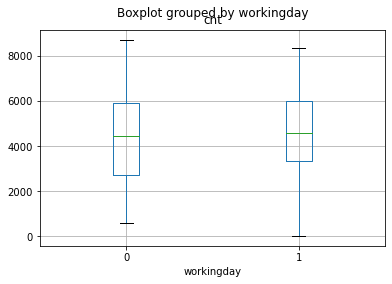

In [11]:
data.boxplot('cnt', 'workingday')

# similar usage on workday and non workday

# checking correlation between categorical variables and count

Import seaborn as sns

In [12]:
import seaborn as sns

Create pair plots for continuous data to investigate correlations (e.g., atemp, temp, windspeed, hum, cnt)

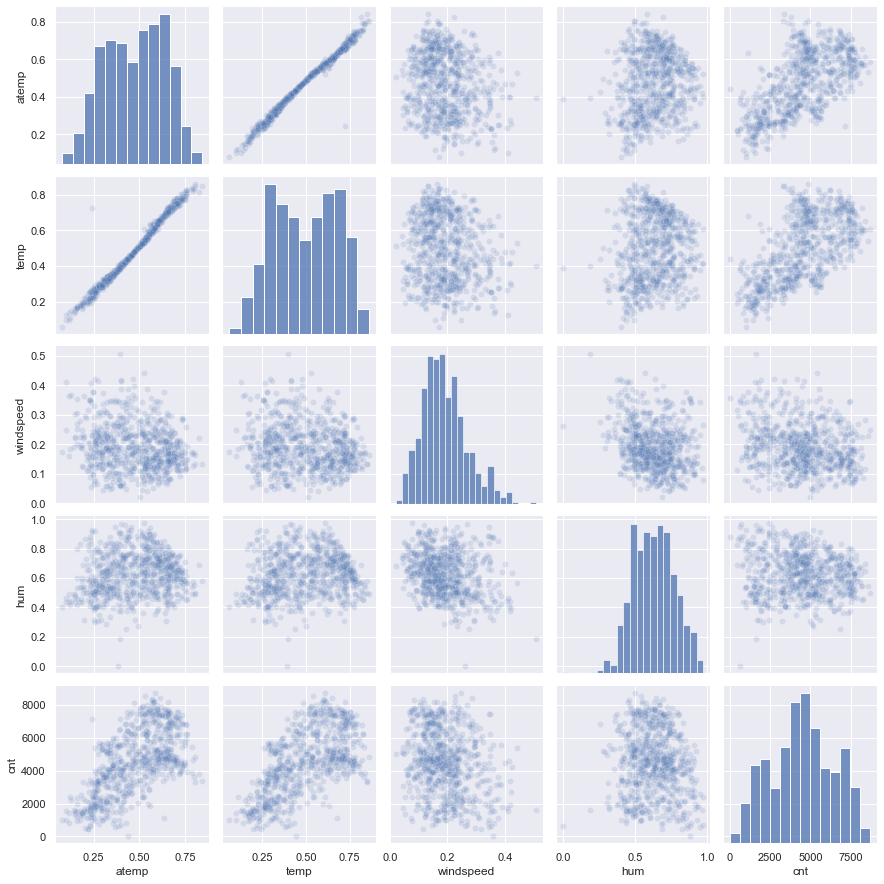

In [19]:
sns.set()
cols = ['atemp', 'temp', 'windspeed', 'hum', 'cnt']
sns.pairplot(data[cols], height=2.5, plot_kws={'alpha':.15})

Calculate correlations

In [21]:
data.corr()['cnt'].sort_values(ascending=False)

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64

Select your features (atemp, weathersit, yr, season) and target (cnt)

In [23]:
features = data[['atemp', 'weathersit', 'yr', 'season']]
target = data.cnt

Import `LinearRegression` from `sklearn.linear_model`

In [24]:
from sklearn.linear_model import LinearRegression

Create a model and fit it on the features and target

In [26]:
model = LinearRegression()
model.fit(features, target)

LinearRegression()

Investigate model coefficients - `model.coef_` & `model.intercept_`

In [27]:
model.coef_

array([5917.41018056, -766.09334606, 2066.37718136,  419.50655133])

In [28]:
model.intercept_

684.4355164727776

Score the model to calcuate R-squared 

In [29]:
model.score(features, target)

0.7783570461505027

Import `mean_squared_error` from `sklearn.metrics`

In [30]:
from sklearn.metrics import mean_squared_error

Calcuate the RMSE for the model by comparing target to predictions

In [32]:
mean_squared_error(target, model.predict(features), squared=False)

911.3951936450068

Import `cross_val_score` from `sklearn.model_selection`

In [34]:
from sklearn.model_selection import cross_val_score

Calculate the RMSE using 10 fold crossvalidation and cross_val_score function (`scoring='neg_root_mean_squared_error`)

In [35]:
cross_val_score(LinearRegression(), features, target, 
                scoring='neg_root_mean_squared_error').mean() * -1

985.6107326064397

Calculate the residuals by subtracting predictinos from target (save as a column in your features DataFrame)

In [36]:
model = LinearRegression()
model.fit(features, target)
data['residuals'] = target - model.predict(features)

# difference between actual and predicted

Plot the residuals as a scatterplot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='atemp', ylabel='residuals'>

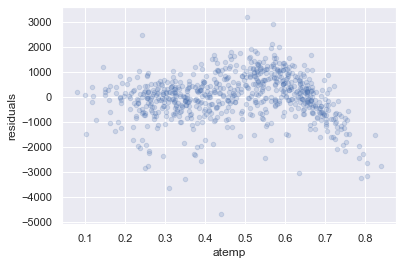

In [38]:
data.plot.scatter(x='atemp', y='residuals', alpha = .2)

# to the right side of the model, past 0.5, we're constantly overpredicting 
# to the left of the model, before 0.5, we're undepredicting